# Import de fonctions

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_diabetes
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import sys

# import UCSL github : UNsupervised Clustering driven by Supervised Learning 
!git clone https://github.com/rlouiset/UCSL > /dev/null 2>&1

sys.path.append('./UCSL/')
from UCSL.UCSL_classifier import *
from UCSL.UCSL_regressor import *


# Import data

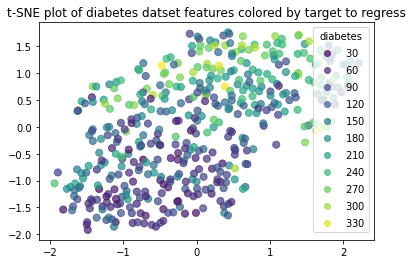

In [2]:
# load diabets dataset
diabetes = load_diabetes()

# get rid of age and sex
X_train = diabetes.data[:,2:]

# normalize training features
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
y_train = diabetes.target

# project both on tSNE
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne = scaler.fit_transform(X_train_tsne)

# plot t-SNE feature projection
fig, ax = plt.subplots()
scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, s=50, alpha=0.7)
ax.legend(*scatter.legend_elements(), title="diabetes")
plt.title("t-SNE plot of diabetes datset features colored by target to regress")
plt.show()


# Diabetes clustering

In [ ]:
# UCSL training
UCSL_method = UCSL_R(C=1, initialization="gaussian_mixture", clustering="gaussian_mixture", maximization="svr", consensus="spectral_clustering", n_clusters=2,
                    n_consensus=20, n_iterations=20, weighting='soft_clustering', stability_threshold=0.9)
UCSL_method = UCSL_method.fit(X_train_scale, y_train)

# KMeans training
KMeans_method = KMeans(n_clusters=2)
KMeans_method = KMeans_method.fit(X_train_scale)

# GaussianMixture training
GaussianMixture_method = GaussianMixture(n_components=2)
GaussianMixture_method = GaussianMixture_method.fit(X_train_scale)


################################################################################


# UCSL predictions
y_pred = np.argmax(UCSL_method.predict_clusters(X_train_scale), 1)
print('UCSL_method :')
print('body mass index of cluster 0 : ', str(np.mean(X_train[y_pred==0, 0]))[:6] + '+/-' + str(np.std(X_train[:, 0]))[:5])
print('body mass index of cluster 1 : ', str(np.mean(X_train[y_pred==1, 0]))[:6] + '+/-' + str(np.std(X_train[:, 0]))[:5])

print('blood pressure of cluster 0 : ', str(np.mean(X_train[y_pred==0, 1]))[:6] + '+/-' + str(np.std(X_train[:, 1]))[:5])
print('blood pressure of cluster 1 : ', str(np.mean(X_train[y_pred==1, 1]))[:6] + '+/-' + str(np.std(X_train[:, 1]))[:5])

fig, ax = plt.subplots()
scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_pred, s=50, alpha=0.7)
ax.legend(*scatter.legend_elements(), title="diabetes")
plt.title("t-SNE plot of diabetes dataset features colored by UCSL cluster predictions")
plt.show()

# KMeans predictions
y_pred = KMeans_method.predict(X_train_scale)
print('KMeans method :')
print('body mass index of cluster 0 : ', str(np.mean(X_train[y_pred==0, 0]))[:6] + '+/-' + str(np.std(X_train[:, 0]))[:5])
print('body mass index of cluster 1 : ', str(np.mean(X_train[y_pred==1, 0]))[:6] + '+/-' + str(np.std(X_train[:, 0]))[:5])

print('blood pressure of cluster 0 : ', str(np.mean(X_train[y_pred==0, 1]))[:6] + '+/-' + str(np.std(X_train[:, 1]))[:5])
print('blood pressure of cluster 1 : ', str(np.mean(X_train[y_pred==1, 1]))[:6] + '+/-' + str(np.std(X_train[:, 1]))[:5])

fig, ax = plt.subplots()
scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_pred, s=50, alpha=0.7)
ax.legend(*scatter.legend_elements(), title="diabetes")
plt.title("t-SNE plot of diabetes dataset features colored by KMeans cluster predictions")
plt.show()

# GaussianMixture predictions
y_pred = GaussianMixture_method.predict(X_train_scale)
print('Gaussian Mixture method :')
print('body mass index of cluster 0 : ', str(np.mean(X_train[y_pred==0, 0]))[:6] + '+/-' + str(np.std(X_train[:, 0]))[:5])
print('body mass index of cluster 1 : ', str(np.mean(X_train[y_pred==1, 0]))[:6] + '+/-' + str(np.std(X_train[:, 0]))[:5])

print('blood pressure of cluster 0 : ', str(np.mean(X_train[y_pred==0, 1]))[:6] + '+/-' + str(np.std(X_train[:, 1]))[:5])
print('blood pressure of cluster 1 : ', str(np.mean(X_train[y_pred==1, 1]))[:6] + '+/-' + str(np.std(X_train[:, 1]))[:5])

fig, ax = plt.subplots()
scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_pred, s=50, alpha=0.7)
ax.legend(*scatter.legend_elements(), title="diabetes")
plt.title("t-SNE plot of diabetes dataset features colored by KMeans cluster predictions")
plt.show()